<br>
<br>

![iteso](https://upload.wikimedia.org/wikipedia/en/5/5f/Western_Institute_of_Technology_and_Higher_Education_logo.png)

###  InstitutoTecnológico y de Estudios Superiores de Occidente ###
###  Maestría Ciencia de Datos  ###
###  Ingeniería de Características ###
###  Práctica - Primer parcial   ###

<br>
<br>

* * *

Estudiante: Daniel Nuño <br>
Profesor: Carlos Augusto Arellano Muro <br>
Fecha entrega: 10 de febrero, 2022 <br>

* * *

<br>
<br>

Lea el archivo dist.data. El archivo presenta datos separados por comas y tiene encabezado.

In [157]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
ruta = 'C:/Users/nuno/OneDrive - ITESO/Ciencia de Datos/ingenieria_de_caracteristicas/'
df = pd.read_csv(ruta+'dist.data')
df.head()

,x_1,x_2,x_3,x_4,x_5,x_6,x_7,y
0,15.310142,NaN,8.436759,3.723421,Dec,NaN,1.319733,21.408846
1,11.841750,1.558534,-4.776643,4.304625,Dec,MB,7.129585,0.273072
2,4.343978,NaN,NaN,4.540588,NaN,MM,NaN,19.010811
3,NaN,2.428672,9.003936,4.456992,NaN,MA,NaN,13.564040
4,14.892188,NaN,8.468824,1.070600,NaN,B,3.369261,25.493163


Si los datos faltantes superan el 60% de los datos por columna, elimine esa columna.

In [158]:
pd.isna(df).sum() / len(df)

x_1    0.083333
x_2    0.498106
x_3    0.121212
x_4    0.039773
x_5    0.285985
x_6    0.321970
x_7    0.706439
y      0.018939
dtype: float64

Las columna x_7 supera el 70% de datos faltantes, por lo tanto la elimino.

In [159]:
df.drop(['x_7'], axis=1, inplace=True)

Sustituya el resto de los datos faltantes:
- Si la variable es categórica sustituya por la moda.
- Si la variable presenta distribución uniforme, sustituya de forma aleatoria (considere como distribución uniforme curtosis menor a -1.2).
- Si la variable presenta una distribución diferente a la uniforme:
    - Sustituya por la media aritmética si presenta un sesgo positivo.
    - Sustituya por la mediana si presenta un sesgo negativo.

In [160]:
df.dtypes

x_1    float64
x_2    float64
x_3    float64
x_4    float64
x_5     object
x_6     object
y      float64
dtype: object

Las variables **x_5** y **x_6** son las únicas variables categóricas, por lo tanto:

In [161]:
df['x_5'] = df['x_5'].fillna(df['x_5'].mode()[0])
df['x_6'] = df['x_6'].fillna(df['x_6'].mode()[0])

In [162]:
df.kurt()

C:\Users\nuno\AppData\Local\Temp/ipykernel_20500/1257127604.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.kurt()


x_1   -1.216049
x_2   -0.081620
x_3   -1.217412
x_4   -0.823828
y     -0.508963
dtype: float64

La variable **x_1** y **x_3** presentan una curtosis menor a -1.2, y entonces sustituimos n valores faltantes usando n falores aleatorios:

In [163]:
for c in ['x_1', 'x_3']:
    for o in np.where(df[c].isna())[0]:
        dim = df[c].dropna().shape[0]
        i = np.random.randint(dim)
        val = df[c].dropna().iloc[i]
        df[c].iloc[o]=val

C:\Users\nuno\Anaconda3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [164]:
print(df['x_2'].skew())
print(df['x_4'].skew())
print(df['y'].skew())

0.19626590402930189
-0.47871412950422076
0.13084423013622387


De las variables restantes con valores faltantes **x_2**, **x_4**, y **y**, la primera y tercera tiene un sesgo positivo y la segunda un sesgo negativo.

In [165]:
df['x_2'] = df['x_2'].fillna(df['x_2'].mean())
df['y'] = df['y'].fillna(df['y'].mean())
df['x_4'] = df['x_4'].fillna(df['x_4'].median())

In [166]:
pd.isna(df).sum() / len(df)

x_1    0.0
x_2    0.0
x_3    0.0
x_4    0.0
x_5    0.0
x_6    0.0
y      0.0
dtype: float64

Realice una regresión lineal de la forma $ y=a_{1}x_{1}+a_{2}x_{3}+a_{3}x_{4}^2+b $ para las variables 'x_1', 'x_3' y el cuadrado de 'x_4'.

Muestre la tendencia para cada columna con 'y' (Grafique los datos y la proyección de la regresión sobre cada una de estas variables).

In [167]:
df['x_4_pow2'] = df['x_4']*df['x_4']

In [168]:
mlr = LinearRegression().fit(df[['x_1', 'x_3', 'x_4_pow2']], df['y'])

In [169]:
print(mlr.coef_, mlr.intercept_)

[ 0.77362355  1.09331753 -0.30145805] 3.683964206384256


Los coeficientes de la regresión son: $$ a_{1} = 0.72 $$ $$ a_{2} = 1.09 $$ $$ a_{3} = -0.32 $$ $$ b = 4.59 $$

Text(0, 0.5, 'y')

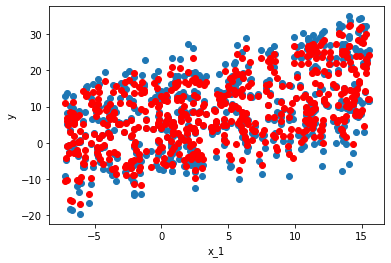

In [170]:
plt.scatter(df['x_1'], df.y)
plt.scatter(df['x_1'], mlr.predict(df[['x_1', 'x_3', 'x_4_pow2']]), c='r')
plt.xlabel('x_1')
plt.ylabel('y')

Text(0, 0.5, 'y')

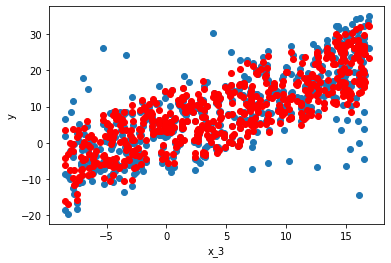

In [171]:
plt.scatter(df['x_3'], df.y)
plt.scatter(df['x_3'], mlr.predict(df[['x_1', 'x_3', 'x_4_pow2']]), c='r')
plt.xlabel('x_3')
plt.ylabel('y')

Text(0, 0.5, 'y')

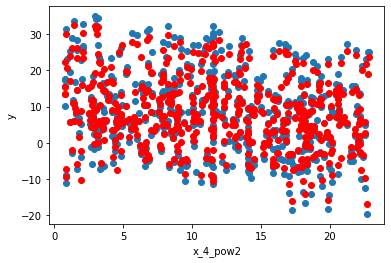

In [172]:
plt.scatter(df['x_4_pow2'], df.y)
plt.scatter(df['x_4_pow2'], mlr.predict(df[['x_1', 'x_3', 'x_4_pow2']]), c='r')
plt.xlabel('x_4_pow2')
plt.ylabel('y')

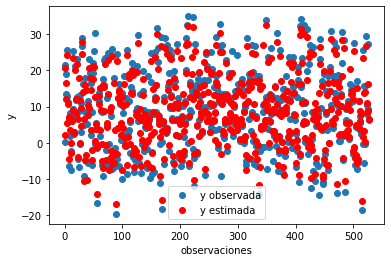

In [173]:
plt.scatter(range(len(df)), df.y)
plt.scatter(range(len(df)), mlr.predict(df[['x_1', 'x_3', 'x_4_pow2']]), c='r')
plt.xlabel('observaciones')
plt.ylabel('y')
plt.legend(['y observada', 'y estimada'])